# Clustering Analysis
Here are several uses of clustering analysis
* singular sample TSNE:
    - immune & Cancer & stroma
    - immune: myeloid & lymphoid
* saving TSNE representation for all samples & saving images of the representation
* Cohort analysis:
 - TSNE representation of all immune cells. saving representation
 - KMEANS with k <- (1,2,3,...,15)
 - will search for gene markers for each cluster.


In [12]:
import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
import os
from os.path import join
import sklearn
from utilities.droplet_dataset import *
# from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
import time
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from scipy import stats
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image, ImageColor
from termcolor import colored
from sklearn.manifold import TSNE
from DL.Mars_seq_DL.data_loading import extract_droplet_data_from_pickle

In [13]:
SAMPLES = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21'

#  singular sample TSNE:
    - immune & Cancer & stroma
    - immune: myeloid & lymphoid

In [25]:
sample_id = 'M97'

sample_path = os.path.join(SAMPLES, f'{sample_id}.pkl')
rna_sample = pickle.load(open(sample_path, 'rb'))
# Only because the samle had been saved in old version without one of the attributes.
_rna_sample = RNAseq_Sample(counts=rna_sample.counts, gene_names=rna_sample.gene_names, barcodes=rna_sample.barcodes, 
                        features=rna_sample.features, cells_information=rna_sample.cells_information)
rna_sample = _rna_sample 
print(f"Number of cells: {rna_sample.number_of_cells}")


rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
rna_sample.normalize_data()
print(f"Number of cells after garbage has removed: {rna_sample.number_of_cells}")


Number of cells: 4296
Number of cells after garbage has removed: 3467


sample shape before process (3467, 21462)
Drawing all cells now
shape after removing gene under variance: (3467, 1099)

Drawing immune cells only
Immune cells shape: (1282, 21462)
shape after removing gene under variance: (1282, 21462)
Dataset was cleared from genes with variance of less than 6
shape after removing gene under variance: (1282, 4)


Text(0.5, 0.98, 'TSNE')

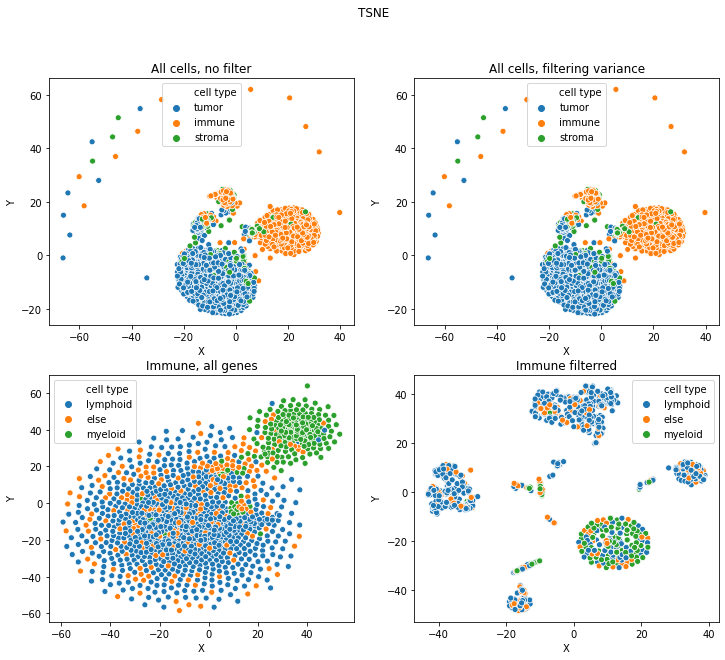

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


#### All cells after filtering variance, immune cells all genes
print(f"sample shape before process {rna_sample.counts.shape}")
print("Drawing all cells now")
is_cancer = all_cells.cells_information.getattr('is_cancer')
is_stroma = all_cells.cells_information.getattr('is_stromal')
is_immune = all_cells.cells_information.getattr('is_immune')
colors = []
for i in range(all_cells.number_of_cells):
    if is_cancer[i]:
        colors.append("tumor")
    elif is_immune[i]:
        colors.append("immune")
    else:
        colors.append("stroma")





# # before filtering variance
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(all_cells.counts)
df_sample = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df_sample["cell type"] = colors
sns.scatterplot(ax=axes[0][0], x="X", y="Y",
              hue="cell type",
              data=df_sample)
axes[0][0].set_title("All cells, no filter")

# filtering variance
all_cells = rna_sample.filter_genes_by_variance(1, in_place=False)
print(f"shape after removing gene under variance: {all_cells.counts.shape}")
# print("Running TSNE on sample")
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(all_cells.counts)
df_sample_variance_filterd = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df_sample_variance_filterd["cell type"] = colors
sns.scatterplot(ax=axes[0][1], x="X", y="Y",
              hue="cell type",
              data=df_sample_variance_filterd)
axes[0][1].set_title("All cells, filtering variance")




print()
print("Drawing immune cells only") 
immune_cells = rna_sample.filter_cells_by_property('is_immune', True)
print(f'Immune cells shape: {immune_cells.counts.shape}')
is_m = immune_cells.cells_information.getattr('is_myeloid')
is_l = immune_cells.cells_information.getattr('is_lymphoid')
colors = []
for i in range(immune_cells.number_of_cells):
    if immune_cells[i][1].is_lymphoid:
        colors.append('lymphoid')
    elif immune_cells[i][1].is_myeloid:
        colors.append('myeloid')
    else:
        colors.append('else')

        
print(f"shape after removing gene under variance: {immune_cells.counts.shape}")
# print("Running TSNE on immune cells")
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(immune_cells.counts)
df_immune = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df_immune["cell type"] = colors
sns.scatterplot(ax=axes[1][0], x="X", y="Y",
              hue="cell type",
              data=df_immune)
axes[1][0].set_title("Immune, all genes")           
        

immune_cells.filter_genes_by_variance(6)


print(f"shape after removing gene under variance: {immune_cells.counts.shape}")
# print("Running TSNE on immune cells")
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(immune_cells.counts)
df_immune_filterred = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df_immune_filterred["cell type"] = colors
sns.scatterplot(ax=axes[1][1], x="X", y="Y",
              hue="cell type",
              data=df_immune_filterred)
axes[1][1].set_title("Immune filterred")
fig.suptitle('TSNE')

sample shape before process (3467, 21462)


In [ ]:
print(f"sample shape before process {rna_sample.counts.shape}")
import copy
_rna_sample = copy.deepcopy(rna_sample)

In [30]:

np.where(_rna_sample.counts[0]!=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

sample shape before process (3467, 21462)
shape after removing gene under variance: (3467, 21462)
Running TSNE on sample
Drawing all cells now

Drawing immune cells only
Number of immune cells: 1282
Immune cells shape: (1282, 21462)
Dataset was cleared from genes with variance of less than 6
shape after reming gene under variance: (1282, 4)
Running TSNE on immune cells


Text(0.5, 0.98, 'TSNE')

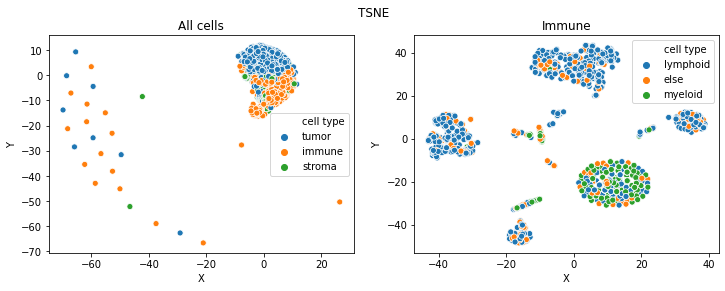